In [ ]:
#!git clone https://github.com/Rutvik-Trivedi/Gujarati-NLP-Toolkit.git 'toolkit'
#!pip3 install python-crfsuite

In [40]:
# In case you want to run the code and check, please download the files at this link, store them in a folder called 'toolkit', and use.
# I had to do this because it was making my .zip file exceed the memory limit
# https://iiitaphyd-my.sharepoint.com/:f:/g/personal/aryan_chandramania_research_iiit_ac_in/ErTUCEKqxQ9FgXqXk16dW9cB2Vow6W-jhrYVrni2TfVp-w?e=9GV8d2

import requests
from bs4 import BeautifulSoup
from toolkit.tokenizer import SentenceTokenizer, WordTokenizer
from toolkit.posTagger import posTagger
from toolkit.stemmer import Stemmer
from toolkit.transliterator import Transliterator
import toolkit.utils.stopwords
import numpy as np
from re import sub, split, M 
from collections import Counter, defaultdict
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from matplotlib import pyplot as plt

In [ ]:
noSentences = 0
corpus=[]
visited_links=[]
file=open('gtext.txt', 'w')
def scrape():
    global corpus
    global visited_links
    global noSentences
    req = requests.get(queue.pop(0))
    html_content = req.content
    soup = BeautifulSoup(html_content, 'html5lib')
    news_corpus = soup.find_all('a')
    for i in soup.find_all("div", class_="description"):
        list = i.findChildren("p")
        for x in list:
            sent_list=x.get_text()
            sentence = SentenceTokenizer(sent_list)
            corpus = corpus + sentence
            noSentences = noSentences + len(sentence)
            #print(noSentences)
            if(noSentences >= 10100):
                return
    for i in news_corpus:
        link=i.get('href')
        if(link is None):
            continue
        if((link.startswith("https://navgujaratsamay.com/")) and (link not in visited_links)):
            queue.append(link)
            visited_links.append(link)
            #print(link)


url = 'https://navgujaratsamay.com/'
queue = [url]
req = requests.get(url)
while(len(queue)>0 and noSentences<10000):
    scrape()
for i in corpus: 
    print(i)
    file.write(i)
print(noSentences)
file.close()

In [ ]:
# Word tokenization and corpus clean-up
tokens=[]
file=open('gtokens.txt','w')
banned = ['.',',','|','***','?','!','\\','\/',':', ')', '(', '"','—',';', '...', '“', '”', '’',',૦,','૦','»', '<','>']
for current in corpus:
    current = current.strip()
    current = sub(r'[a-zA-Z\|\n0-9]*', '', current)
    current = sub(r'([.!?])', r'\1 ', current)
    current = split(r'  ',current)
    # if not current[-1]:
    #     del(current[-1])
    for i in current:
        i = WordTokenizer(i, keep_punctuations=True, keep_stopwords=True)
        for x in i:
            if(x not in banned):
                tokens.append(x)
                file.write(f'{x}\n')
print(tokens)
file.close()

['એજન્સી', 'દિલ્હી', 'કાળઝાળ', 'ગરમીનો', 'સામનો', 'કરી', 'રહેલા', 'લોકો', 'માટે', 'રાહતના', 'સમાચાર', 'છે', 'આ', 'વર્ષે', 'દક્ષિણ', 'પશ્ચિમ', 'ચોમાસું', 'વહેલું', 'આવી', 'રહ્યું', 'છે', 'અંદામાન', 'અને', 'નિકોબાર', 'ટાપુઓ', 'પર', 'મેના', 'રોજ', 'પ્રથમ', 'મોસમી', 'વરસાદ', 'થવાની', 'ધારણા', 'છે', 'સામાન્ય', 'રીતે', 'ચોમાસું', 'મે', 'સુધીમાં', 'અંદામાન', 'અને', 'નિકોબાર', 'ટાપુઓ', 'પર', 'પહોંચી', 'જાય', 'છે', 'આ', 'વર્ષે', 'ચોમાસું', 'સમય', 'કરતાં', 'ચાર', 'દિવસ', 'પહેલાં', 'મેના', 'રોજ', 'કેરળ', 'પહોંચે', 'તેવી', 'શક્યતા', 'છે', 'ભારતીય', 'હવામાન', 'વિભાગે', 'ગુરુવારે', 'એક', 'નિવેદનમાં', 'જણાવ્યું', 'હતું', 'કે', 'દક્ષિણ', 'પશ્ચિમ', 'ચોમાસું', 'મેની', 'આસપાસ', 'દક્ષિણ', 'અંદામાન', 'સાગર', 'અને', 'તેની', 'નજીકના', 'દક્ષિણપૂર્વ', 'ખાડી', 'સુધી', 'પહોંચવાની', 'સંભાવના', 'છે', 'હવામાનશાસ્ત્રીઓના', 'જણાવ્યા', 'અનુસાર', 'વિસ્તૃત', 'આગાહીમાં', 'કેરળમાં', 'ચોમાસું', 'વહેલું', 'શરૂ', 'થવાના', 'અને', 'ઉત્તર', 'તરફ', 'આગળ', 'વધવાના', 'સંકેતો', 'છે', 'આનાથી', 'દેશના', 'મોટાભાગના', 'ભાગોમાં', 'લોકોન

In [ ]:
#POS Tagging
file=open('gpostags.txt','w')
tagger = posTagger(corpus='prose')
tagger.eval()
pos_tags = []
for token in tokens:
    pos_tags.append(tagger.pos_tag(token))
for i in pos_tags:
    try: 
        print(f"{i[0][0]} --> {i[0][1]} \n")
        file.write(f"{i[0][0]} --> {i[0][1]} \n")
    except IndexError: continue
print('hello')

Streaming output truncated to the last 5000 lines.

જેનું --> PRL 

એક --> QTC 

અદકેરું --> JJ 

મૂલ્ય --> NN 

છે --> VAUX 

તે --> DMD 

આપણને --> PRP 

મુકુન્દરાય --> NN 

પરાશર્યનાં --> NN 

સુંદર --> JJ 

લખાણો --> VAUX 

પરથી --> PSP 

મળે --> VM 

છે --> VAUX 

સર --> PSP 

પટ્ટણીનું --> NN 

‹વ્યક્તિત્વ --> NN 

દર્શન’ --> VAUX 

કરાવીને --> VAUX 

મુકુન્દભાઈએ --> NN 

આપણા --> PRP 

પર --> PSP 

ઉપકાર --> NN 

કર્યો --> VM 

છે --> VAUX 

તેમ --> PSP 

કહેવામાં --> VAUX 

અતિશયોક્તિ --> JJ 

નથી --> NEG 

આપણી --> PRP 

સામે --> PSP 

આ --> DMD 

વ્યક્તિત્વ --> NN 

દર્શનનું --> VAUX 

પુસ્તક --> NN 

એક --> QTC 

અવિકારી --> JJ 

સનાતન --> NNP 

સત્ય --> NN 

તરીકે --> PSP 

મુકાયું --> VM 

છે --> VAUX 

પ્રેરણાદાયક --> JJ 

છે --> VAUX 

ભાવનગર --> JJ 

રાજ્યના --> NN 

ખ્યાતનામ --> JJ 

દીવાન --> JJ 

સર --> PSP 

પ્રભાશંકર --> JJ 

પટ્ટણીની --> NN 

વિશેષ --> JJ 

સ્મૃતિ --> NN 

તેમની --> PRP 

જન્મજયંતીના --> NN 

એપ્રિલ --> NN 

માસમાં --> NN 

વિશેષ --> JJ 

થાય --> 

In [ ]:
#Remove Stopwords
prose_stopwords = ['હે','છે','કે','જો','જી','ને','નાં','નું','ની','નો','તો','જો','લેતા','શા','હો','હોઈ','મા','બધું','મી','એન','તું','છો','છીએ','નં','એવો','હોવા','તેથી','નું','છ','એવા',
             'એની',
             'થતાં',
             'જેવી',
             'બંને',
             'હશે',
             'માં',
             'ની',
             'હતાં',
             'તેવી',
             'થયો',
             'એવી',
             'થી',
             'થયું',
             'ત્યાં',
             'છતાં',
             'તેઓ',
             'તેમ',
             'ને',
             'તેને',
             'હું',
             'બાદ',
             'શકે',
             'જો',
             'રહી',
             'એમ',
             'તેના',
             'કરે',
             'થઇ',
             'સુધી',
             'કોઈ',
             'ના',
             'હવે',
             'તેની',
             'ન',
             'જે',
             'તા',
             'હોય',
             'હતું',
             'એ',
             'કરી',
             'તે',
             'હતી',
             'માટે',
             'તો',
             'જ',
             'પણ',
             'કે',
             'આ',
             'અને',
             'અમે',
             'તમે']
tokens_without_sw = [word for word in tokens if not word in prose_stopwords]
file=open("gnostop.txt", "w")
for i in tokens_without_sw:
    print(f"{i}\n")
    file.write(f"{i}\n")
file.close()

Streaming output truncated to the last 5000 lines.
અઘરું

મહત્વનું

 કામ

માથા

પર

લે

કદાચ

તેમનું

પોતાની

જાત

સાથેનું

કમિટમેન્ટ

તેમની

સમગ્ર

જીવનયાત્રા

સૂર્યાસ્ત

સમયે

છઠ્ઠી

જાન્યુઆરીથી

જીવનના

છેલ્લા

શ્વાસ

ભાવનગર

રાજ્યના

પ્રજાજનોનાં

સુખદુઃખ

સમજવા

તથા

તેનો

ઉકેલ

લાવવા

રાજ્યનાં

દૂરનાં

ગામડાઓની

એક

કઠિન

યાત્રા

તબિયત

નરમ

શરીર

પહેલાં

જેવો

સાથ

આપે

તેવું

નથી

આમ

મક્કમ

નિર્ધાર

ભાવનગર

રાજ્યના

સામાન્ય

લોકોના

હિતને

હૈયામાં

રાખી

«છેલ્લી

મુસાફરી»નો

આરંભ

થાય

સર

પટ્ટણીના

મિત્ર

તથા

પ્રશંસક

કવિ

દુલા

ભાયા

કાગ

સંદર્ભમાં

લખે

છે:

ભાવેણું

માંગણું

માંગે

બુઢો

સૌ

સુખડાં

ત્યાગે

દેહે

ડગમગતો

લાગે

દેહ

ભલે

ડગમગતો

મનોબળ

મજબૂત

દિશા

સ્પષ્ટ

દેહ

તેનો

કાળધર્મ

નિભાવે

પરંતુ

તેનાથી

થાકી

જનાર

હાર

કબૂલ

કરનાર

મહાનાયક

નથી

લોકોના

કલ્યાણની

ચિંતા

કરીને

તેમજ

તેમની

સમસ્યાઓ

સમજીને

ઉકેલ

કરવા

યાત્રા

આરંભાઇ

મહાત્મા

ગાંધીના

જીવનના

અંતિમ

ચરણમાં

નોઆખલીની

યાત્રાની

અહીં

સ્મૃતિ

થાય

લોકહિતની

જ્વલંત

મશાલ

હૈયામાં

ધગધગતી

આવું

કા

In [ ]:
#Stemming
stemmer = Stemmer()
stems=[]
file=open('gstem.txt','w')
for i in tokens:
    stemm = stemmer.stem(i)
    stems.append(stemm)
    file.write(f'{stemm}\n')
print(stems)

['એજન્સ', 'દિલ્હ', 'કાળઝાળ', 'ગરમી', 'સામ', 'કરી', 'રહેલા', 'લોક', 'માટે', 'રાહત', 'સમાચાર', 'છે', 'આ', 'વર્ષ', 'દક્ષિણ', 'પશ્ચિમ', 'ચોમાસુ', 'વહેલુ', 'આવ', 'રહ', 'છે', 'ંદામાન', 'અને', 'નિકોબાર', 'ટાપુ', 'પર', 'મે', 'રોજ', 'પ્રથમ', 'મોસમ', 'વરસાદ', 'થવા', 'ધારણા', 'છે', 'સામાન્ય', 'રીત', 'ચોમાસુ', 'મ', 'સુધી', 'ંદામાન', 'અને', 'નિકોબાર', 'ટાપુ', 'પર', 'પહોંચ', 'જાય', 'છે', 'આ', 'વર્ષ', 'ચોમાસુ', 'સમય', 'કર', 'ચાર', 'દિવસ', 'પહેલા', 'મે', 'રોજ', 'કેરળ', 'પહોંચ', 'તેવી', 'શક્ય', 'છે', 'ભારતીય', 'હવામાન', 'વિભાગ', 'ગુરુવાર', 'એક', 'નિવેદન', 'જણાવ', 'હતું', 'કે', 'દક્ષિણ', 'પશ્ચિમ', 'ચોમાસુ', 'મે', 'આસપાસ', 'દક્ષિણ', 'ંદામાન', 'સાગર', 'અને', 'તેની', 'નજીક', 'દક્ષિણપૂર્વ', 'ખાડ', 'સુધી', 'પહોંચવા', 'સંભાવ', 'છે', 'હવામાનશાસ્ત્રીઓ', 'જણાવ', 'નુસાર', 'વિસ્તૃત', 'આગાહી', 'કેરળ', 'ચોમાસુ', 'વહેલુ', 'શરૂ', 'થવ', 'અને', 'ઉત્તર', 'તરફ', 'આગળ', 'વધવ', 'સંકેત', 'છે', 'આના', 'દેશ', 'મોટાભાગ', 'ભાગો', 'લોકો', 'રાહત', 'મળશ', 'જે', 'એક', 'પખવાડિ', 'કર', 'વધુ', 'સમય', 'આકર', 'ગરમી', 'સામ', 'કરી', 'રહ', 

[['એક', 950], ['પર', 784], ['સાથે', 783], ['હતો', 693], ['નથી', 648], ['હતા', 628], ['આવી', 554], ['કરવામાં', 472], ['થઈ', 465], ['દ્વારા', 455], ['થાય', 406], ['પરંતુ', 405], ['સમય', 357], ['વધુ', 354], ['ત્યારે', 323], ['રીતે', 310], ['આવે', 306], ['નહીં', 302], ['કારણે', 288], ['બે', 286], ['પછી', 281], ['સામે', 278], ['કરવા', 274], ['કહ્યું', 258], ['રહ્યા', 254], ['જણાવ્યું', 238], ['જાય', 225], ['જ્યારે', 221], ['આપણે', 207], ['મળી', 206], ['બની', 206], ['કરીને', 206], ['કરતા', 198], ['એટલે', 196], ['કર્યો', 196], ['લોકો', 194], ['નવગુજરાત', 189], ['જેમાં', 189], ['રહે', 187], ['આજે', 183], ['કરતાં', 182], ['શરૂ', 178], ['તથા', 177], ['થશે', 173], ['તેમણે', 172], ['ગયા', 170], ['માત્ર', 169], ['આવ્યો', 168], ['વાત', 164], ['રહ્યો', 162], ['દરમિયાન', 162], ['અન્ય', 161], ['જોઈએ', 159], ['આવ્યા', 158], ['જોવા', 155], ['કામ', 154], ['મળે', 154], ['રહ્યું', 154], ['આવ્યું', 153], ['મને', 151], ['આપી', 149], ['તમામ', 147], ['તેમના', 143], ['પોલીસ', 140], ['શું', 137], ['સૌથી', 136], [

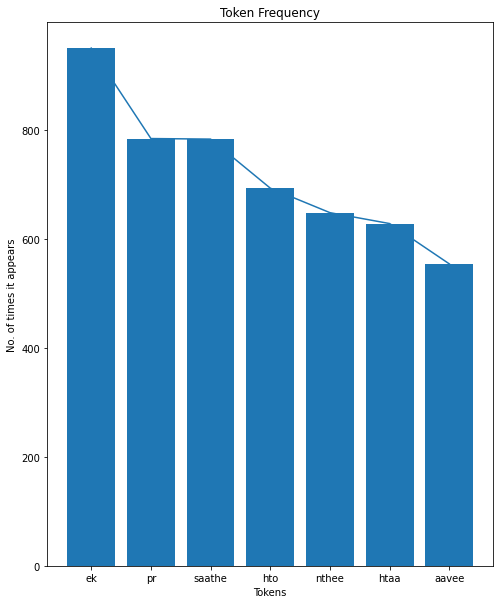

In [36]:
token_counts = Counter(tokens_without_sw)
token_counts = [[word, freq] for word,freq in sorted(token_counts.items(), key=lambda i: i[1])][::-1]

print(token_counts)

courses = [token_counts[i][0] for i in range(0, 7)]
frequencies = [token_counts[i][1] for i in range(0,7)]
print(courses)
transliterator =toolkit.transliterator.Transliterator()
course=[]
for line in courses:
    course.append(transliterator.gujarati_to_english(line))
print(frequencies)
fig = plt.figure(figsize=(8,10))
plt.xlabel("Tokens")
plt.ylabel("No. of times it appears")
plt.title("Token Frequency")
plt.bar(course, frequencies)
plt.plot(course,frequencies)
plt.show()

Counter({'NN': 42651, 'VAUX': 28252, 'JJ': 17894, 'PSP': 12613, 'VM': 11154, 'CCD': 7045, 'DMD': 5165, 'NNP': 5103, 'PRP': 5077, 'RPD': 4278, 'NST': 3499, 'QTF': 2233, 'CCS': 2094, 'QTC': 2063, 'NEG': 1948, 'PRL': 1255, 'DMI': 788, 'PRF': 764, 'QTO': 702, 'PUNC': 688, 'PRQ': 676, 'RB': 490, 'DMQ': 471, 'PRI': 310, 'N-NNP': 63, 'PRC': 43, 'INJ': 42})
['NN', 'VAUX', 'JJ', 'PSP', 'VM', 'CCD', 'DMD', 'NNP', 'PRP', 'RPD']
[42651, 28252, 17894, 12613, 11154, 7045, 5165, 5103, 5077, 4278]


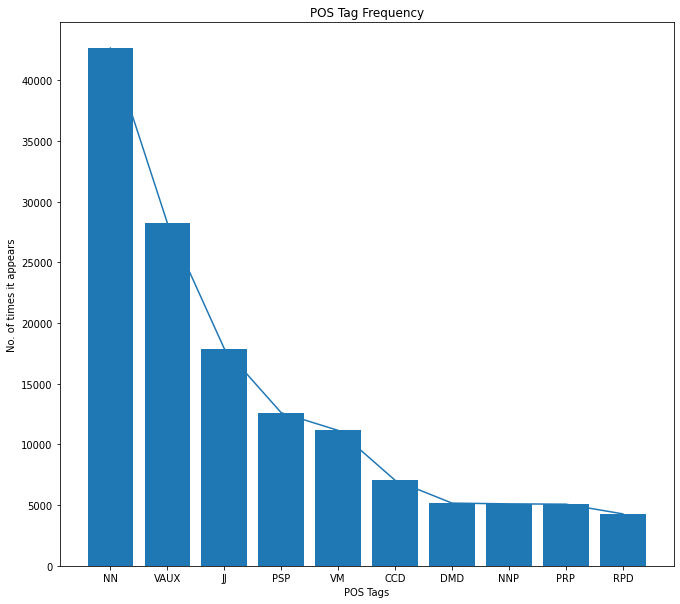

In [38]:
taglist=[]
for line in pos_tags:
    for i in line:
      taglist.append(i[1])

postag_counts = Counter(taglist)

print(postag_counts)
postag_counts = [[word, freq] for word,freq in sorted(postag_counts.items(), key=lambda i: i[1])][::-1]

courses = [postag_counts[i][0] for i in range(0, 10)]
frequencies = [postag_counts[i][1] for i in range(0,10)]
print(courses)
print(frequencies)
fig = plt.figure(figsize=(11,10))
plt.xlabel("POS Tags")
plt.ylabel("No. of times it appears")
plt.title("POS Tag Frequency")
plt.bar(courses, frequencies)
plt.plot(courses,frequencies)
plt.show()

[['છે', 6374], ['અને', 3105], ['આ', 2285], ['કે', 1869], ['પણ', 1665], ['જ', 1477], ['આવ', 1349], ['કરી', 1204], ['તે', 1150], ['ન', 1147], ['કર', 1136], ['જે', 1113], ['માટે', 1109], ['તો', 1035], ['હતી', 1035], ['એ', 1029], ['એક', 966], ['પર', 854], ['સાથ', 798], ['હોય', 775], ['હત', 734], ['હતું', 730], ['હ', 658], ['કરવ', 653], ['તેમ', 617], ['રહ', 614], ['બ', 603], ['સમય', 569], ['મળ', 523], ['થઈ', 485], ['જો', 468], ['વર્ષ', 466], ['દ્વારા', 457], ['થ', 456], ['ત્યાર', 443], ['કારણ', 424], ['આપ', 414], ['પરંતુ', 407], ['થાય', 406], ['વધુ', 404], ['કહ', 388], ['સરકાર', 379], ['હોવા', 351], ['સુધી', 349], ['ના', 346], ['શકે', 346], ['કોઈ', 345], ['પડ', 343], ['સામ', 328], ['દિવસ', 327], ['મ', 321], ['જણાવ', 320], ['રીત', 318], ['માં', 313], ['આપણ', 307], ['રહી', 306], ['નહી', 303], ['કરવા', 298], ['બાદ', 291], ['પછ', 290], ['તેની', 290], ['ભારત', 269], ['તેના', 263], ['હવે', 260], ['પોલીસ', 255], ['ગ', 253], ['તેને', 236], ['ગુજરાત', 235], ['માર', 235], ['આજ', 234], ['વાત', 232], [

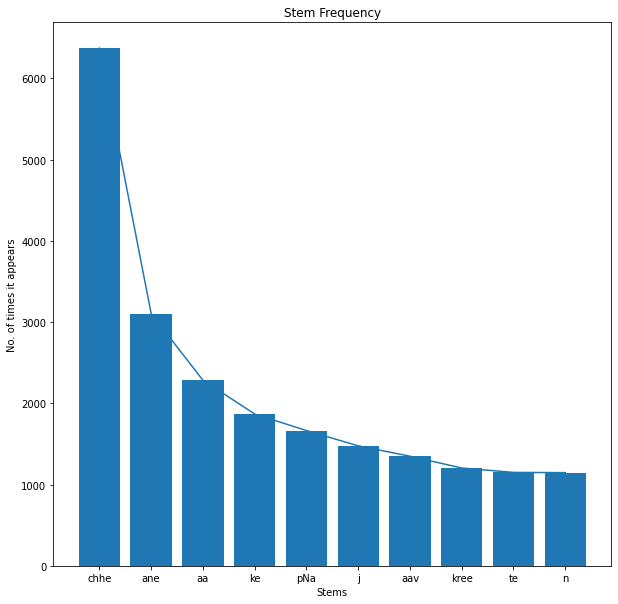

In [43]:
stem_counts = defaultdict(lambda: 0)
for i in stems:
    stem_counts[str(i)]+=1
stem_counts = [[word, freq] for word,freq in sorted(stem_counts.items(), key=lambda i: i[1])][::-1]

print(stem_counts)

courses = [stem_counts[i][0] for i in range(0, 10)]
frequencies = [stem_counts[i][1] for i in range(0,10)]
print(courses)
transliterator =toolkit.transliterator.Transliterator()
course=[]
for line in courses:
    course.append(transliterator.gujarati_to_english(line))
print(frequencies)
fig = plt.figure(figsize=(10,10))
plt.xlabel("Stems")
plt.ylabel("No. of times it appears")
plt.title("Stem Frequency")
plt.bar(course, frequencies)
plt.plot(course,frequencies)
plt.show()

In [44]:
token_counts = Counter(tokens_without_sw)
token_counts = [[word, freq] for word,freq in sorted(token_counts.items(), key=lambda i: i[1])][::-1]
courses = [token_counts[i][0] for i in range(0, 40)]
print(courses)
transliterator =toolkit.transliterator.Transliterator()
course=[]
for line in courses:
    course.append(transliterator.gujarati_to_english(line))
wc = WordCloud(background_color = 'black', width = 1920, height = 1080)
wc.generate_from_text(" ".join(course))
wc.to_file('gwordcloud.png')

['એક', 'પર', 'સાથે', 'હતો', 'નથી', 'હતા', 'આવી', 'કરવામાં', 'થઈ', 'દ્વારા', 'થાય', 'પરંતુ', 'સમય', 'વધુ', 'ત્યારે', 'રીતે', 'આવે', 'નહીં', 'કારણે', 'બે', 'પછી', 'સામે', 'કરવા', 'કહ્યું', 'રહ્યા', 'જણાવ્યું', 'જાય', 'જ્યારે', 'આપણે', 'મળી', 'બની', 'કરીને', 'કરતા', 'એટલે', 'કર્યો', 'લોકો', 'નવગુજરાત', 'જેમાં', 'રહે', 'આજે']
